
<h1><center> Assignment 4</center></h1>
<h2><center>Cole Dixon


## coding portion
#### Problem 3

In [45]:
import numpy as np
from matplotlib import pyplot as plt
from time import perf_counter

In [46]:
def left(i):
    return 2*i+1

def right(i):
    return 2*i+2

def parent(i):
    return (i-1)//2

def max_heapify(A,i=0,heap_size = -1):
    if heap_size == -1:
        heap_size = len(A)
    l, r = left(i),right(i)
    if l < heap_size and A[l] > A[i]:
        largest = l
    else: largest = i
    if r < heap_size and A[r] > A[largest]:
        largest = r
    if largest != i:
        A[i],A[largest] = A[largest],A[i]
        max_heapify(A,i = largest,heap_size=heap_size)

def build_max_heap(A):
    for i in range(0,(len(A)//2)):
        max_heapify(A,i = (len(A)//2)-1-i)
        
def is_max_heap(A):
    for i in range(1,len(A)):
        p = parent(i)
        if A[p] < A[i]:
            return False
    return True

def heapsort(A):
    build_max_heap(A)
    for i in range(0,len(A)-1):
        A[0] , A[len(A)-1-i] = A[len(A)-1-i], A[0]
        max_heapify(A,heap_size=len(A)-1-i)
    return A

In [47]:
# helper functions

def is_sorted(A):
    for i in range(0,len(A)-2):
        if A[i] > A[i+1]:
            return False
    return True

def check_validity(func):
    rng = np.random.default_rng()
    for i in range(100,400,10):
        ints = rng.integers(0,1000,i)
        if not is_sorted(func(list(ints))):
            return False
    return True

def compare_worst(*algos,max_size = 400,trials = 100):
    rng = np.random.default_rng()
    fig, ax = plt.subplots()
    x_axis = range(10,max_size,10)
    ax.set_title("Worst Runtimes comparison. Trials = " + str(trials))
    ax.set_xlabel("List size")
    ax.set_ylabel("Runtime in seconds")
    for algo in algos:
        times = []
        for size in range(10,max_size,10):
            worst_time = 0
            for i in range(0,trials):
                int_list = rng.integers(0,1000,size)

                start = perf_counter()
                algo(list(int_list))
                end = perf_counter()

                if worst_time < (end-start): worst_time = (end-start)
            times.append(worst_time)
        
        ax.plot(x_axis, times, label = f"{algo.__name__}")
    ax.legend()
    plt.show()

def compare_average(*algos,max_size = 400,trials = 100):
    rng = np.random.default_rng()
    fig, ax = plt.subplots()
    x_axis = range(10,max_size,10)
    ax.set_title("Average Runtimes comparison. Trials = " + str(trials))
    ax.set_xlabel("List size")
    ax.set_ylabel("Runtime in seconds")
    for algo in algos:
        times = []
        for size in range(10,max_size,10):
            time = 0
            for i in range(0,trials):
                int_list = rng.integers(0,1000,size)

                start = perf_counter()
                algo(list(int_list))
                end = perf_counter()

                time += (end-start)
            times.append(time/trials)
    
        ax.plot(x_axis, times, label = f"{algo.__name__}")
    ax.legend()
    plt.show()

def make_sorta_sorted(n, mess_factor):
    rng = np.random.default_rng()
    A = sorted(rng.integers(1,1000,n))
    percent = int((mess_factor * n) // 2)
    for i in range(percent):
        j_1, j_2 = rng.integers(0,n,2)
        A[j_1], A[j_2] = A[j_2], A[j_1]
    return A

def compare_adaptive(*algos,max_size = 400,trials = 100):
    rng = np.random.default_rng()
    fig, ax = plt.subplots()
    x_axis = range(10,max_size,10)
    ax.set_title("Best Runtimes comparison on partially sorted lists. Trials = " + str(trials))
    ax.set_xlabel("List size")
    ax.set_ylabel("Runtime in seconds")
    for algo in algos:
        times = []
        for size in range(10,max_size,10):
            best_time = 100
            for i in range(0,trials):
                int_list = make_sorta_sorted(size,0.1)
                start = perf_counter()
                algo(list(int_list))
                end = perf_counter()

                if (end-start) < best_time: best_time = (end-start)
            times.append(best_time)
    
        ax.plot(x_axis, times, label = f"{algo.__name__}")
    ax.legend()
    plt.show()


In [48]:
#insertion sort for comparison
def insertionsort(A):
    for i in range(0,len(A)-1):
        if A[i] > A[i+1]:
            insert = i+1
            for j in range(0,i+1):
                if A[insert] < A[i-j]:
                    A[insert],A[i-j] = A[i-j],A[insert]
                    insert = i-j
    return A

#merge sort for comparison
def merge(left,right):
    merge_list = []
    left_index, right_index = 0, 0
    while(left_index < len(left) and right_index < len(right)):
        if left[left_index] > right[right_index]:
            merge_list.append(right[right_index])
            right_index+=1
        else:
            merge_list.append(left[left_index])
            left_index+=1
    if left_index == len(left):
        merge_list += right[right_index:]
    elif right_index == len(right):
        merge_list += left[left_index:]
    return merge_list

def mergesort(A):
    if len(A) == 1:
        return A
    mid = len(A)//2
    left = mergesort(A[0:mid])
    right = mergesort(A[mid:])
    return merge(left,right)

#quick sort for comparison
def partition(A,p,r):
    pivot = A[r]
    i = p-1
    for j in range(p,r):
        if A[j] <= pivot:
            i += 1
            A[i], A[j] = A[j], A[i]
    A[i+1], A[r] = A[r], A[i+1]
    return i+1

def quicksort(A,start = 0,stop = -1):
    if stop == -1:
        stop = len(A)-1
    if start < stop:
        q = partition(A,start,stop)
        quicksort(A,start,q-1)
        quicksort(A,q+1,stop)
    return A

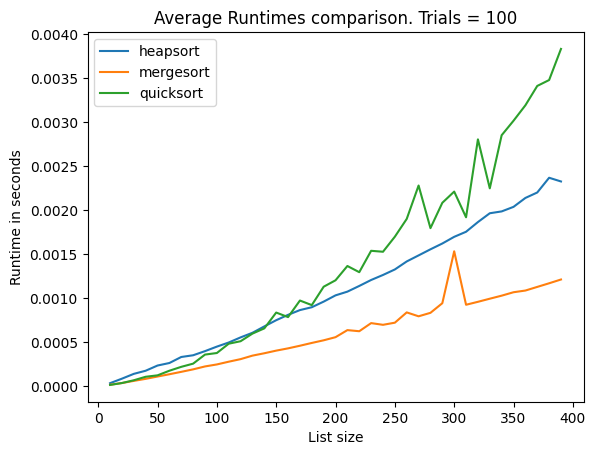

In [50]:
compare_average(heapsort,mergesort,quicksort)

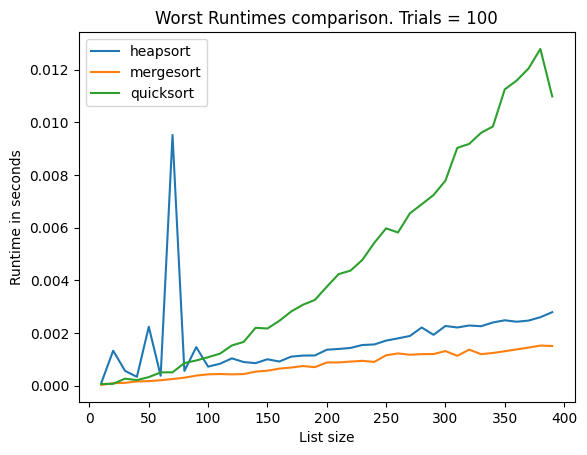

In [51]:
compare_worst(heapsort,mergesort,quicksort)